In [33]:
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint
from gensim.models import CoherenceModel, LdaModel
from gensim.models import Phrases
from gensim.models.wrappers import LdaMallet

from gensim.corpora import Dictionary
from gensim.test.utils import datapath
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from pprint import pprint
import matplotlib.pyplot as plt
import operator
import numpy as np
from numpy import array
import pandas as pd
import csv

In [34]:
fo_pos = pd.ExcelFile('Tugas Akhir\\File Positif v4.xlsx')
df_pos = pd.read_excel(fo_pos, 'Sheet1')
text_pos = df_pos['Review']
text_list_pos =  [i.split() for i in text_pos]

fo_neg = pd.ExcelFile('Tugas Akhir\\File Negatif v4.xlsx')
df_neg = pd.read_excel(fo_neg, 'Sheet1')
text_neg = df_neg['Review']
text_list_neg =  [i.split() for i in text_neg]

print(len(text_list_pos), len(text_list_neg))

2585 1405


In [35]:
#Create Biagram & Trigram Models 

# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram_pos = Phrases(text_list_pos, min_count=5)    
#dia dijadikan satu kata, ketika ada dua kata yang kemunculannya minimal 10 kali
trigram_pos = Phrases(bigram_pos[text_list_pos], min_count=10)

for idx in range(len(text_list_pos)):
    for token in bigram_pos[text_list_pos[idx]]:
        if ' ' in token:
            # Token is a bigram, add to document.
            text_list_pos[idx].append(token)
    for token in trigram_pos[text_list_pos[idx]]:
        if ' ' in token:
            # Token is a bigram, add to document.
            text_list_pos[idx].append(token)
            
bigram_neg = Phrases(text_list_neg, min_count=5)    #dia dijadikan satu kata, ketika ada dua kata yang kemunculannya minimal 10 kali
trigram_neg = Phrases(bigram_neg[text_list_neg], min_count=10)

for idx in range(len(text_list_neg)):
    for token in bigram_neg[text_list_neg[idx]]:
        if ' ' in token:
            # Token is a bigram, add to document.
            text_list_neg[idx].append(token)
    for token in trigram_neg[text_list_neg[idx]]:
        if ' ' in token:
            # Token is a bigram, add to document.
            text_list_neg[idx].append(token)

In [36]:
dictionary_pos = corpora.Dictionary(text_list_pos)
dictionary_pos.filter_extremes(no_below=5, no_above=0.2)# no_below kemunculan ga boleh dibawah 5, 
print(dictionary_pos)

dictionary_neg = corpora.Dictionary(text_list_neg)
dictionary_neg.filter_extremes(no_below=5, no_above=0.2)# no_below kemunculan ga boleh dibawah 5, 
print(dictionary_neg)

Dictionary(401 unique tokens: ['fasilitas', 'terus', 'tingkatkan', 'cukup_baik', 'bagus']...)
Dictionary(472 unique tokens: ['mobil', 'parkir', 'antre', 'dapat', 'padahal']...)


In [37]:
#build corpus
doc_term_matrix_pos = [dictionary_pos.doc2bow(doc) for doc in text_list_pos]

print(len(doc_term_matrix_pos))
print(doc_term_matrix_pos[100])

tfidf_pos = models.TfidfModel(doc_term_matrix_pos)
corpus_tfidf_pos = tfidf_pos[doc_term_matrix_pos]

doc_term_matrix_neg = [dictionary_neg.doc2bow(doc) for doc in text_list_neg]

print(len(doc_term_matrix_neg))
print(doc_term_matrix_neg[100])

tfidf_neg = models.TfidfModel(doc_term_matrix_neg)
corpus_tfidf_neg = tfidf_neg[doc_term_matrix_neg]

2585
[(6, 1), (42, 1)]
1405
[(163, 1), (244, 1)]


In [38]:
#function to compute coherence values
def compute_coherence_values_pos(dictionary_pos, corpus, texts, limit, start, step):
    coherence_values_pos = []
    np.random.seed(10)
    model_list_pos = []
    for num_topics_pos in range(start, limit, step):
        model_pos = LdaModel(corpus=corpus, id2word=dictionary_pos, num_topics=num_topics_pos, iterations=100)
        #membangun model lda
        model_list_pos.append(model_pos)
        coherencemodel_pos = CoherenceModel(model=model_pos, texts=texts, dictionary=dictionary_pos, coherence='c_v')
        coherence_values_pos.append(coherencemodel_pos.get_coherence())
        
    return model_list_pos, coherence_values_pos

def compute_coherence_values_neg(dictionary_neg, corpus, texts, limit1, start1, step1):
    coherence_values_neg = []
    np.random.seed(10)
    model_list_neg = []
    for num_topics_neg in range(start1, limit1, step1):
        model_neg = LdaModel(corpus=corpus, id2word=dictionary_neg, num_topics=num_topics_neg, iterations=100)#membangun model lda
        model_list_neg.append(model_neg)
        coherencemodel_neg = CoherenceModel(model=model_neg, texts=texts, dictionary=dictionary_neg, coherence='c_v')
        coherence_values_neg.append(coherencemodel_neg.get_coherence())
        
    return model_list_neg, coherence_values_neg

In [39]:
start=1 #topic k nya mulai dari k=2
limit=20 # from 2 until 20
step=1 

model_list, coherence_values_pos = compute_coherence_values_pos(dictionary_pos, corpus=corpus_tfidf_pos, 
                                                        texts=text_list_pos, start=start, limit=limit, step=step)




In [40]:
start1=1 #topic k nya mulai dari k=2
limit1=20 # from 2 until 20
step1=1
model_list_neg, coherence_values_neg = compute_coherence_values_neg(dictionary_neg, corpus=corpus_tfidf_neg, 
                                                        texts=text_list_neg, start1=start1, limit1=limit1, step1=step1)

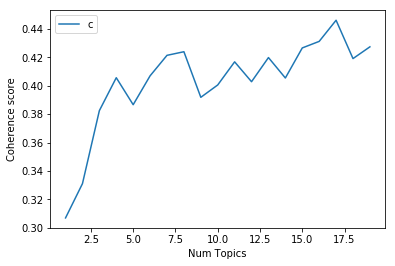

In [41]:
#show graphs

x = range(start, limit, step)
plt.plot(x, coherence_values_pos)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

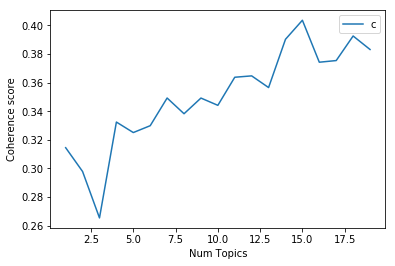

In [42]:
x1 = range(start1, limit1, step1)
plt.plot(x1, coherence_values_neg)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [43]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_pos):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3069
Num Topics = 2  has Coherence Value of 0.331
Num Topics = 3  has Coherence Value of 0.3824
Num Topics = 4  has Coherence Value of 0.4056
Num Topics = 5  has Coherence Value of 0.3866
Num Topics = 6  has Coherence Value of 0.4069
Num Topics = 7  has Coherence Value of 0.4213
Num Topics = 8  has Coherence Value of 0.4239
Num Topics = 9  has Coherence Value of 0.3918
Num Topics = 10  has Coherence Value of 0.4005
Num Topics = 11  has Coherence Value of 0.4167
Num Topics = 12  has Coherence Value of 0.4028
Num Topics = 13  has Coherence Value of 0.4198
Num Topics = 14  has Coherence Value of 0.4054
Num Topics = 15  has Coherence Value of 0.4265
Num Topics = 16  has Coherence Value of 0.4311
Num Topics = 17  has Coherence Value of 0.446
Num Topics = 18  has Coherence Value of 0.419
Num Topics = 19  has Coherence Value of 0.4273


In [44]:
for m, cv in zip(x1, coherence_values_neg):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3145
Num Topics = 2  has Coherence Value of 0.2979
Num Topics = 3  has Coherence Value of 0.2654
Num Topics = 4  has Coherence Value of 0.3325
Num Topics = 5  has Coherence Value of 0.3251
Num Topics = 6  has Coherence Value of 0.3299
Num Topics = 7  has Coherence Value of 0.3493
Num Topics = 8  has Coherence Value of 0.3383
Num Topics = 9  has Coherence Value of 0.3492
Num Topics = 10  has Coherence Value of 0.3441
Num Topics = 11  has Coherence Value of 0.3638
Num Topics = 12  has Coherence Value of 0.3647
Num Topics = 13  has Coherence Value of 0.3566
Num Topics = 14  has Coherence Value of 0.3903
Num Topics = 15  has Coherence Value of 0.4036
Num Topics = 16  has Coherence Value of 0.3743
Num Topics = 17  has Coherence Value of 0.3754
Num Topics = 18  has Coherence Value of 0.3926
Num Topics = 19  has Coherence Value of 0.3832


In [45]:
modelp = LdaModel(corpus=corpus_tfidf_pos, id2word=dictionary_pos, num_topics=16)
pprint(modelp.print_topics())

[(0,
  '0.059*"sudah" + 0.045*"cekatan" + 0.044*"semua" + 0.044*"perawat" + '
  '0.041*"dokter" + 0.028*"jauh" + 0.027*"ramah" + 0.026*"bisa" + '
  '0.025*"harga" + 0.025*"baru"'),
 (1,
  '0.070*"banyak" + 0.062*"ramah" + 0.031*"cepat" + 0.030*"menangani" + '
  '0.030*"biasa" + 0.028*"pasien" + 0.028*"pengunjung" + 0.025*"dokter" + '
  '0.025*"bagus" + 0.020*"dapat"'),
 (2,
  '0.083*"petugas" + 0.070*"sangat_membantu" + 0.055*"standar" + '
  '0.046*"perawat" + 0.046*"ramah" + 0.032*"sangat_bersih" + 0.028*"dokter" + '
  '0.028*"benar" + 0.025*"bahkan" + 0.024*"tolong"'),
 (3,
  '0.156*"lengkap" + 0.084*"prima" + 0.077*"fasilitas" + 0.065*"unggul" + '
  '0.035*"kualitas" + 0.030*"parkir" + 0.025*"igd" + 0.025*"nyaman" + '
  '0.024*"luas" + 0.024*"bersih"'),
 (4,
  '0.045*"baik" + 0.044*"gedung" + 0.036*"modern" + 0.024*"luas" + '
  '0.024*"hebat" + 0.022*"bersih" + 0.021*"terbaik" + 0.020*"nyaman" + '
  '0.020*"ramah" + 0.017*"kantin"'),
 (5,
  '0.046*"ruang" + 0.045*"mumpuni" + 0.041*"

In [46]:
modeln = LdaModel(corpus=corpus_tfidf_neg, id2word=dictionary_neg, num_topics=15)
pprint(modeln.print_topics())

[(0,
  '0.017*"sekali" + 0.015*"susah" + 0.014*"parkir" + 0.013*"pendaftaran" + '
  '0.013*"obat" + 0.013*"bpjs" + 0.012*"dokter" + 0.012*"lama" + '
  '0.011*"pelayanan" + 0.011*"pasien"'),
 (1,
  '0.025*"antre" + 0.024*"parkir" + 0.020*"lama" + 0.020*"kecewa" + '
  '0.017*"masih" + 0.015*"merasa" + 0.015*"pelayanan" + 0.015*"rumah_sakit" + '
  '0.012*"anda" + 0.011*"banyak"'),
 (2,
  '0.027*"sudah" + 0.023*"pelayanan" + 0.021*"antrean" + 0.015*"lama" + '
  '0.014*"dokter" + 0.014*"tolong" + 0.012*"sekali" + 0.012*"membingungkan" + '
  '0.011*"suster" + 0.011*"panjang"'),
 (3,
  '0.017*"tidak_ada" + 0.016*"lama" + 0.016*"pelayanan" + 0.015*"parkir" + '
  '0.015*"dokter" + 0.015*"menunggu" + 0.015*"rumah_sakit" + 0.015*"seperti" + '
  '0.014*"ugd" + 0.012*"masuk"'),
 (4,
  '0.024*"susah" + 0.023*"parkir" + 0.023*"penuh" + 0.021*"dokter" + '
  '0.014*"kamar" + 0.014*"pelayanan" + 0.013*"rumah_sakit" + 0.012*"harus" + '
  '0.012*"balik" + 0.012*"antre"'),
 (5,
  '0.022*"mungkin" + 0.021*"

In [47]:
model = LdaModel(corpus=corpus_tfidf_pos, id2word=dictionary_pos, num_topics=16)
topik_pos = []
for idx, topic in model.print_topics(-1):
    topik_p = []
    positif = 'Topic:{} Word:{}'.format(idx, topic)
    topik_p.append(positif)
    topik_pos.append(topik_p)

filename = 'Tugas Akhir\Topik positif fix 2 v4.csv'
#filename = 'Data_Bersih\Topik Positif 2.csv'

with open(filename, "w",encoding='utf-8', newline ='') as f:
    writer = csv.writer(f)
    writer.writerows(topik_pos)
    
    
print('exported: '+filename)
print('-Selesai-')

exported: Tugas Akhir\Topik positif fix 2 v4.csv
-Selesai-


In [48]:
model = LdaModel(corpus=corpus_tfidf_neg, id2word=dictionary_neg, num_topics=15)
topik_neg = []
for idx, topic in model.print_topics(-1):
    topik_n = []
    negatif = 'Topic:{} Word:{}'.format(idx, topic)
    topik_n.append(negatif)
    topik_neg.append(topik_n)

filename = 'Tugas Akhir\Topik negatif fix 2 v4.csv'
#filename = 'Data_Bersih\Topik Negatif 2.csv'

with open(filename, "w",encoding='utf-8', newline ='') as f:
    writer = csv.writer(f)
    writer.writerows(topik_neg)
    
    
print('exported: '+filename)
print('-Selesai-')
    
    #     print('Topic: {} Word: {}'.format(idx, topic))

exported: Tugas Akhir\Topik negatif fix 2 v4.csv
-Selesai-
